# Olympics

Ini adalah kumpulan data historis Olimpiade modern, dari Athena 1896 hingga Rio 2016. Setiap baris terdiri dari atlet individu yang berkompetisi dalam acara Olimpiade dan medali mana yang dimenangkan (jika ada).

Tidak yakin harus mulai dari mana? Gulir ke bawah untuk menemukan tantangan!

In [2]:
import pandas as pd

olymp = pd.read_csv("data/athlete_events.csv.gz")
print(olymp.shape)
olymp.head()

(271116, 15)


,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Data Dictionary

| Column   | Explanation                         |
| -------- | ----------------------------------- |
| id       | Nomor unik untuk setiap atlet       |
| name     | Nama atlet                          |
| sex      | M atau F                            |
| age      | Usia atlet                          |
| height   | Dalam sentimeter                    |
| weight   | Dalam kilogram                      |
| team     | Nama tim                            |
| noc      | Komite Olimpiade Nasional (3 huruf) |
| games    | Tahun dan musim                     |
| year     | Bilangan bulat                      |
| season   | Musim panas atau musim dingin       |
| city     | Kota tuan rumah                     |
| sport    | Olahraga                            |
| event    | Acara                               |
| medal    | Emas, Perak, Perunggu, atau NA      |

[Source](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) and [license](https://creativecommons.org/publicdomain/zero/1.0/) of the dataset.
The dataset is a consolidated version of data from www.sports-reference.com. 

In [3]:
df = pd.DataFrame(olymp)

In [4]:
df.dtypes

id          int64
name       object
sex        object
age       float64
height    float64
weight    float64
team       object
noc        object
games      object
year        int64
season     object
city       object
sport      object
event      object
medal      object
dtype: object

In [5]:
df['sport'].value_counts()

sport
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: count, Length: 66, dtype: int64

In [6]:
df.isnull().sum()

id             0
name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64

## Terlihat Bahwa Umur, Height, dan Weight memiliki nilai null, jadi untuk mengisi nilai null, kita coba dengan analisis deskriptif. kenapa analisis deskriptiv? karena peraturan olimpiade tidak ada batasan dengan umur,tinggi,dan berat seseorang.

## lalu untuk medal terdapat nilai null berarti atlet tersebut belum pernah memiliki medal manapun, jadi kita isi saya "belum_punyal_medal"

In [7]:
df.describe()

,id,age,height,weight,year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### terlihat bahwa umur
max = 97
min = 10
rata = 25

### terlihat bahwa tinggi
max = 226
min = 127
rata = 175

### terlihat bahwa berat
max = 214
min = 25
rata = 70

berdasarkan data yg kita analisis ini tidak dapat diisi semua nya, karena ada beberapa kategori olahraga yg mengharuskan dan tidak ada batasan. kita coba untuk lihat data olahraga apa yg memiliki nilai null di umur,tinggi,dan berat nya

In [8]:
missing_values_by_sport = df.groupby('sport')[['height', 'weight', 'age']].apply(lambda x: x.isnull().sum())

# Menampilkan hasil
print("Baris-baris dengan nilai NULL untuk berat, tinggi, dan umur, dikelompokkan berdasarkan 'sport':")
print(missing_values_by_sport)


Baris-baris dengan nilai NULL untuk berat, tinggi, dan umur, dikelompokkan berdasarkan 'sport':
                  height  weight  age
sport                                
Aeronautics            1       1    0
Alpine Skiing       2435    2479   78
Alpinism              25      25    9
Archery              389     448   80
Art Competitions    3519    3523  507
...                  ...     ...  ...
Tug-Of-War           145     118   44
Volleyball           121     127    9
Water Polo          1058    1122  200
Weightlifting        929     134  206
Wrestling           1808    1849  491

[66 rows x 3 columns]


In [9]:
# kita isi saja umur, tinggi, dan berat dengan median
# Mengisi nilai null dengan median
median_age = df['age'].median()
median_height = df['height'].median()
median_weight = df['weight'].median()

df['age'].fillna(median_age, inplace=True)
df['height'].fillna(median_height, inplace=True)
df['weight'].fillna(median_weight, inplace=True)

In [10]:
#kita isi juga medal dengan belum_punya_medal
df["medal"].unique()
df["medal"] = df["medal"].fillna("belum_punya_medal")

In [11]:
df.isnull().sum()

id        0
name      0
sex       0
age       0
height    0
weight    0
team      0
noc       0
games     0
year      0
season    0
city      0
sport     0
event     0
medal     0
dtype: int64

In [12]:
df["medal"].unique()

array(['belum_punya_medal', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [13]:
df["medal"].head()

0    belum_punya_medal
1    belum_punya_medal
2    belum_punya_medal
3                 Gold
4    belum_punya_medal
Name: medal, dtype: object

### terlihat bahwa sudah full terisi, tidak ada nilai null

# Sekarang waktunya jelajahi data

In [14]:
# Filter data untuk Tim Belanda
netherlands_data = df[df['team'] == 'Netherlands']

# Hitung jumlah medali untuk setiap kombinasi tahun dan kota
medals_by_year_city = netherlands_data.groupby(['year', 'city'])['medal'].count()

# Temukan kombinasi tahun dan kota dengan jumlah medali terbanyak
most_medals_year_city = medals_by_year_city.idxmax()

# Tampilkan hasil
print("Belanda memenangkan jumlah medali terbanyak pada tahun {} di kota {}".format(most_medals_year_city[0], most_medals_year_city[1]))


Belanda memenangkan jumlah medali terbanyak pada tahun 1928 di kota Amsterdam


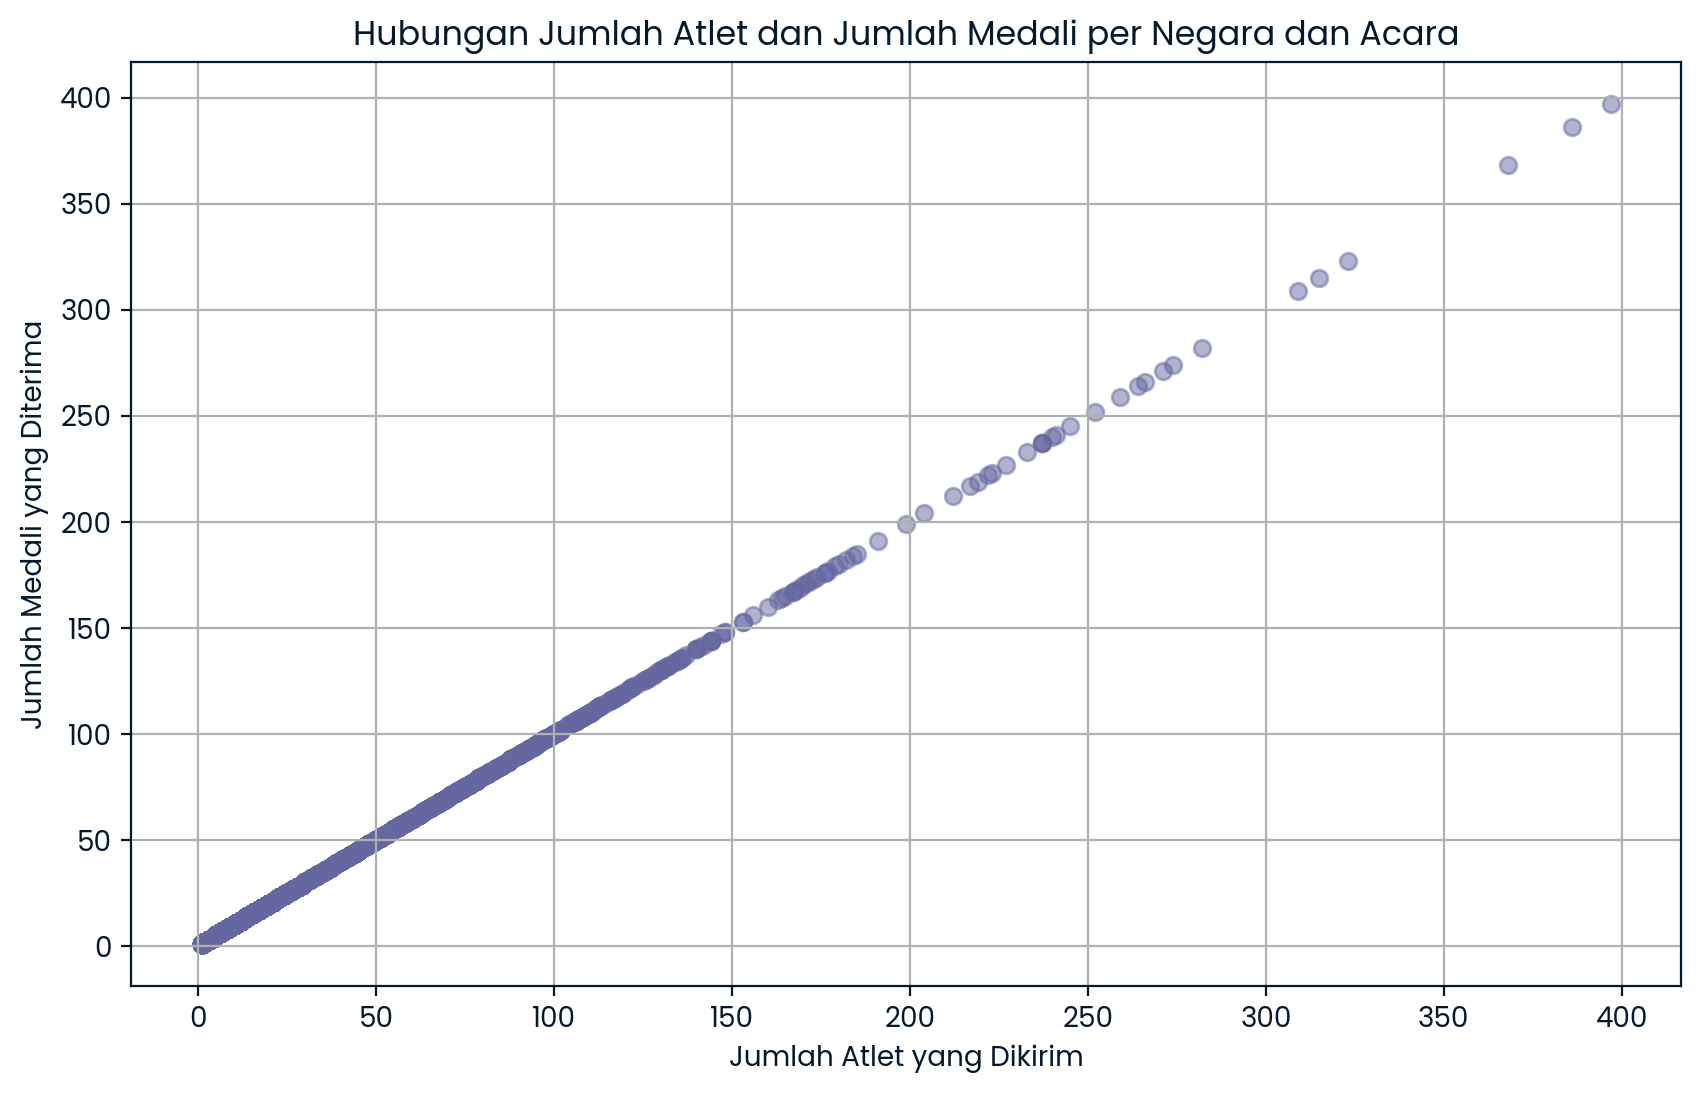

In [15]:
import matplotlib.pyplot as plt

# Hitung jumlah atlet dan jumlah medali untuk setiap negara dan acara
athlete_medal_counts = df.groupby(['team', 'event']).agg({'id': 'count', 'medal': lambda x: x.notnull().sum()}).reset_index()
athlete_medal_counts.columns = ['team', 'event', 'athlete_count', 'medal_count']

# Buat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(athlete_medal_counts['athlete_count'], athlete_medal_counts['medal_count'], alpha=0.5)
plt.title('Hubungan Jumlah Atlet dan Jumlah Medali per Negara dan Acara')
plt.xlabel('Jumlah Atlet yang Dikirim')
plt.ylabel('Jumlah Medali yang Diterima')
plt.grid(True)
plt.show()


In [16]:
# Menyaring data atlet yang memenangkan medali
medalists_data = df[df['medal'].notnull()]

# Analisis statistik deskriptif tentang tinggi atlet yang memenangkan medali untuk setiap cabang olahraga
median_height_by_sport = medalists_data.groupby('sport')['height'].median()

# Analisis statistik deskriptif tentang tinggi atlet secara umum dalam dataset
overall_median_height = df['height'].median()

# Membandingkan median tinggi atlet yang memenangkan medali dengan tinggi atlet secara umum
print("Median Tinggi Atlet yang Memenangkan Medali per Cabang Olahraga:")
print(median_height_by_sport)
print("\nMedian Tinggi Atlet secara Umum dalam Dataset: ", overall_median_height)


Median Tinggi Atlet yang Memenangkan Medali per Cabang Olahraga:
sport
Aeronautics         175.0
Alpine Skiing       175.0
Alpinism            175.0
Archery             175.0
Art Competitions    175.0
                    ...  
Tug-Of-War          175.0
Volleyball          186.0
Water Polo          180.0
Weightlifting       172.0
Wrestling           175.0
Name: height, Length: 66, dtype: float64

Median Tinggi Atlet secara Umum dalam Dataset:  175.0


In [17]:
# Menyaring data untuk hanya mencakup entri yang terkait dengan tim Argentina dan Amerika pada tahun 2004
argentina_data_2004 = df[(df['team'] == 'Argentina') & (df['year'] == 2004)]
usa_data_2004 = df[(df['team'] == 'United States') & (df['year'] == 2004)]

# Analisis statistik deskriptif untuk tinggi, berat, dan umur tim Argentina pada tahun 2004
argentina_stats_2004 = argentina_data_2004[['height', 'weight', 'age']].describe()

# Analisis statistik deskriptif untuk tinggi, berat, dan umur tim Amerika pada tahun 2004
usa_stats_2004 = usa_data_2004[['height', 'weight', 'age']].describe()

# Menampilkan hasil perbandingan
print("Statistik Deskriptif untuk Tim Argentina pada tahun 2004:")
print(argentina_stats_2004)
print("\nStatistik Deskriptif untuk Tim Amerika pada tahun 2004:")
print(usa_stats_2004)


Statistik Deskriptif untuk Tim Argentina pada tahun 2004:
           height      weight         age
count  175.000000  175.000000  175.000000
mean   177.234286   75.157143   27.011429
std     11.992190   16.015246    5.486649
min    154.000000   47.000000   18.000000
25%    170.000000   63.000000   23.000000
50%    175.000000   74.000000   27.000000
75%    185.000000   85.000000   29.000000
max    208.000000  120.000000   52.000000

Statistik Deskriptif untuk Tim Amerika pada tahun 2004:
           height      weight         age
count  706.000000  706.000000  706.000000
mean   176.930595   73.563739   26.439093
std     12.455401   16.996939    6.183928
min    147.000000   43.000000   15.000000
25%    167.000000   62.000000   22.000000
50%    177.000000   72.000000   26.000000
75%    186.000000   84.000000   30.000000
max    213.000000  161.000000   52.000000


dari data diatas memang tidak dapat disimpulkan dari analisis deskriptif tinggi, berat, dan umur nya, mungkin ada faktor lain yg mempengaruhi tim amerika bisa kalah dari argentina bukan hanya sebatas fisik saja, mungkin bisa dari segi komposisi tim, persiapan dan strategi, faktor psikologis, peforma selama pertandingan. dan lain lain

<Figure size 1000x600 with 0 Axes>

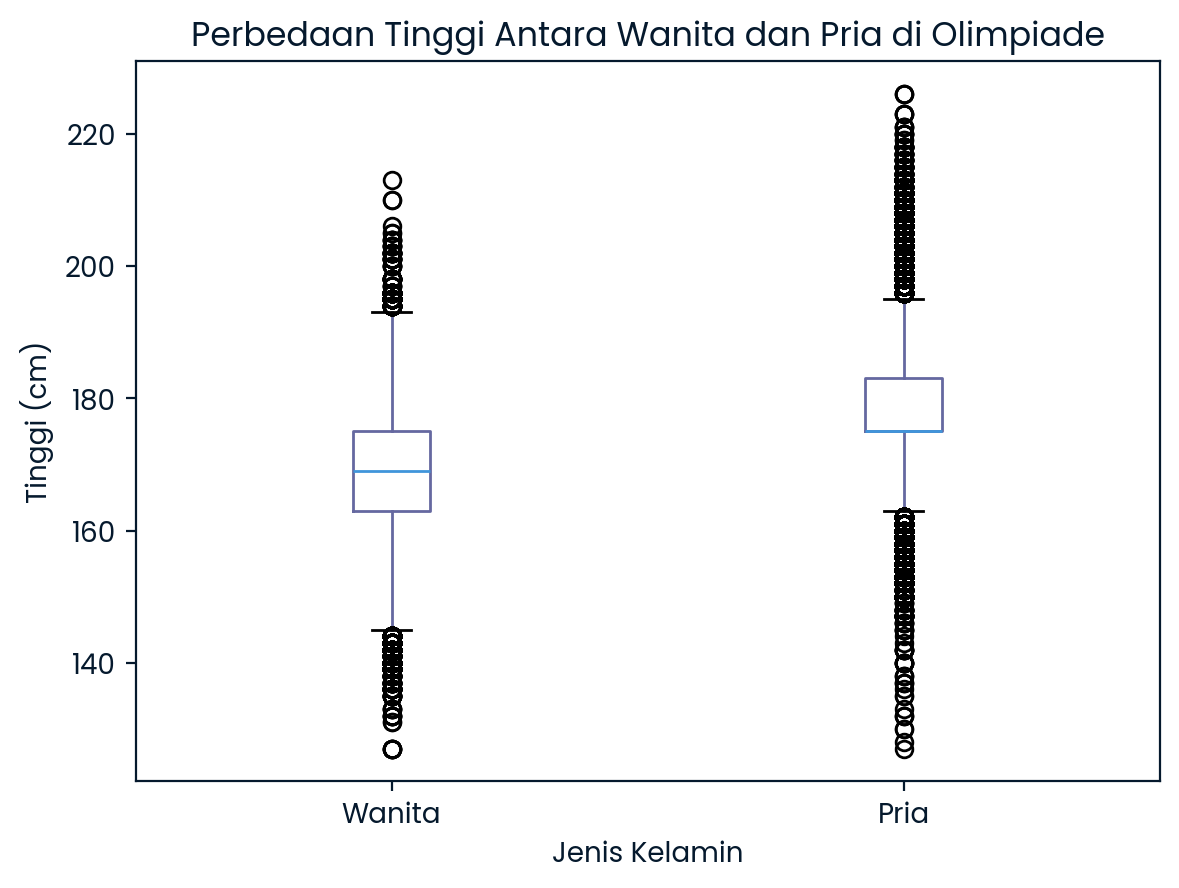

In [18]:
import matplotlib.pyplot as plt

# Filter data untuk hanya mencakup entri yang memiliki nilai tinggi yang tidak kosong
height_data = df[df['height'].notnull()]

# Buat boxplot untuk perbedaan tinggi antara wanita dan pria
plt.figure(figsize=(10, 6))
height_data.boxplot(column='height', by='sex', grid=False)
plt.title('Perbedaan Tinggi Antara Wanita dan Pria di Olimpiade')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Tinggi (cm)')
plt.xticks([1, 2], ['Wanita', 'Pria'])
plt.suptitle('')
plt.show()


In [21]:
# Misalnya, df adalah DataFrame awal dan data_clean adalah DataFrame yang telah dibersihkan

# Periksa apakah data_clean sama dengan df
if data_clean.equals(df):
    # Jika sama, lakukan eksport data ke file CSV
    data_clean.to_csv('data/clean_data.csv', index=False)
    print("Data berhasil dieksport ke file 'data.csv'")
else:
    # Jika tidak sama, tampilkan pesan kesalahan
    print("DataFrame 'data_clean' tidak sama dengan DataFrame 'df'. Eksport tidak dapat dilakukan.")


Data berhasil dieksport ke file 'data.csv'
